In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

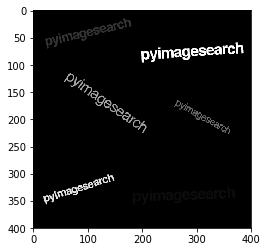

In [2]:
# load the original image, convert it to grayscale, and display
# it inline
image = cv2.imread("example.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

In [3]:
%load_ext cython

In [4]:
%%cython -a

def threshold_slow(T, image):
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            image[y, x] = 255 if image[y, x] >= T else 0
            
    # return the thresholded image
    return image

In [5]:
%timeit threshold_slow(5, image)

244 ms ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


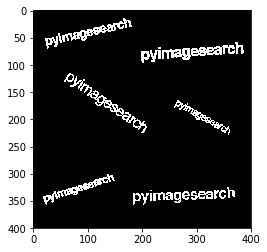

In [6]:
# threshold our image to validate that it's working
image = threshold_slow(5, image)
plt.imshow(image, cmap="gray")

In [7]:
%%cython -a
import cython

@cython.boundscheck(False)
cpdef unsigned char[:, :] threshold_fast(int T, unsigned char [:, :] image):
    # set the variable extension types
    cdef int x, y, w, h
    
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            image[y, x] = 255 if image[y, x] >= T else 0
    
    # return the thresholded image
    return image

In [8]:
# reload the original image and convert it to grayscale
image = cv2.imread("example.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [11]:
%timeit threshold_fast(5, image)

40.8 µs ± 618 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
